In [6]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

import PhenomA as pa
import LISA as li
import WaveformTools as wt

# Setup LISA object, load sky & polarization averaged transfer function, plot sensitivity curve


### LISA object options

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Tobs, default=4 yr ---- example: lisa = li.LISA(Tobs=li.YEAR)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Larm, default=2.5e9 (meters)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; NC,   default=2 (number of data channels, 1 or 2)

[1.97249890e-27 1.84074704e-27 1.71779615e-27 1.60305830e-27
 1.49598483e-27 1.39606374e-27 1.30281723e-27 1.21579943e-27
 1.13459425e-27 1.05881338e-27 9.88094486e-28 9.22099406e-28
 8.60512587e-28 8.03039552e-28 7.49405496e-28 6.99353971e-28
 6.52645664e-28 6.09057246e-28 5.68380307e-28 5.30420363e-28
 4.94995918e-28 4.61937602e-28 4.31087361e-28 4.02297698e-28
 3.75430968e-28 3.50358724e-28 3.26961097e-28 3.05126226e-28
 2.84749723e-28 2.65734174e-28 2.47988670e-28 2.31428378e-28
 2.15974130e-28 2.01552046e-28 1.88093183e-28 1.75533202e-28
 1.63812061e-28 1.52873732e-28 1.42665928e-28 1.33139854e-28
 1.24249973e-28 1.15953791e-28 1.08211659e-28 1.00986576e-28
 9.42439875e-29 8.79516486e-29 8.20795571e-29 7.65997031e-29
 7.14856530e-29 6.67127786e-29 6.22590888e-29 5.81039240e-29
 5.42246642e-29 5.06006757e-29 4.72239511e-29 4.40863603e-29
 4.11492904e-29 3.83747541e-29 3.57869853e-29 3.34183731e-29
 3.12248659e-29 2.91471662e-29 2.71890715e-29 2.53713032e-29
 2.36811630e-29 2.209719

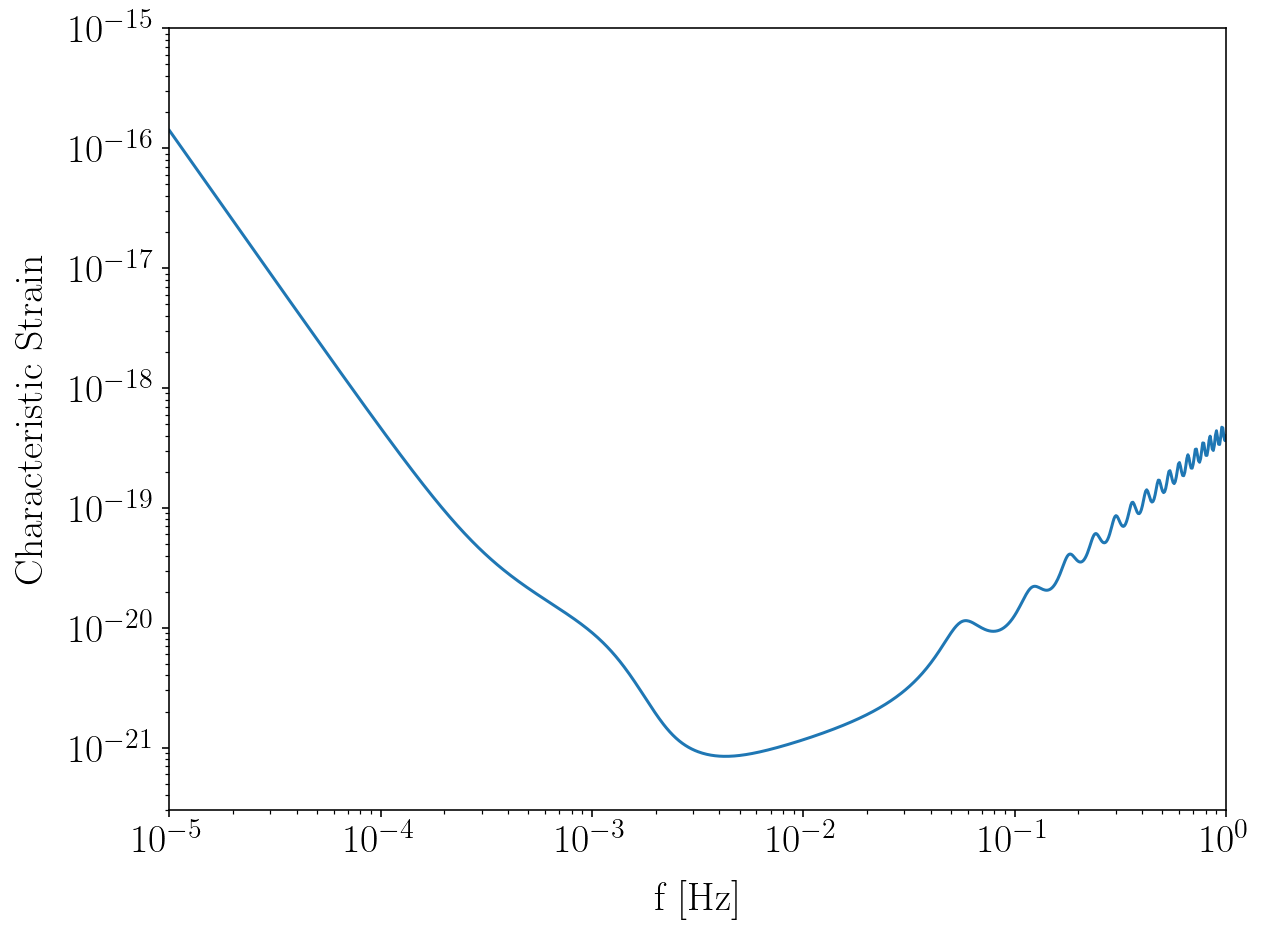

In [7]:
# create LISA object
lisa = li.LISA() 

# Plot LISA's sensitivity curve
f  = np.logspace(np.log10(1.0e-5), np.log10(1.0e0), 1000)
print(f)
Sn = lisa.Sn(f)
print(Sn)
li.PlotSensitivityCurve(f, Sn) # provide additional argument, e.g. 'SensitivityCurve.pdf', to save figure

# Setup Binary Parameters and create a binary object

Redshift provided. 
	Luminosity Distance........... 25924.151861680206 Mpc

SNR........ 2642.3472328183843


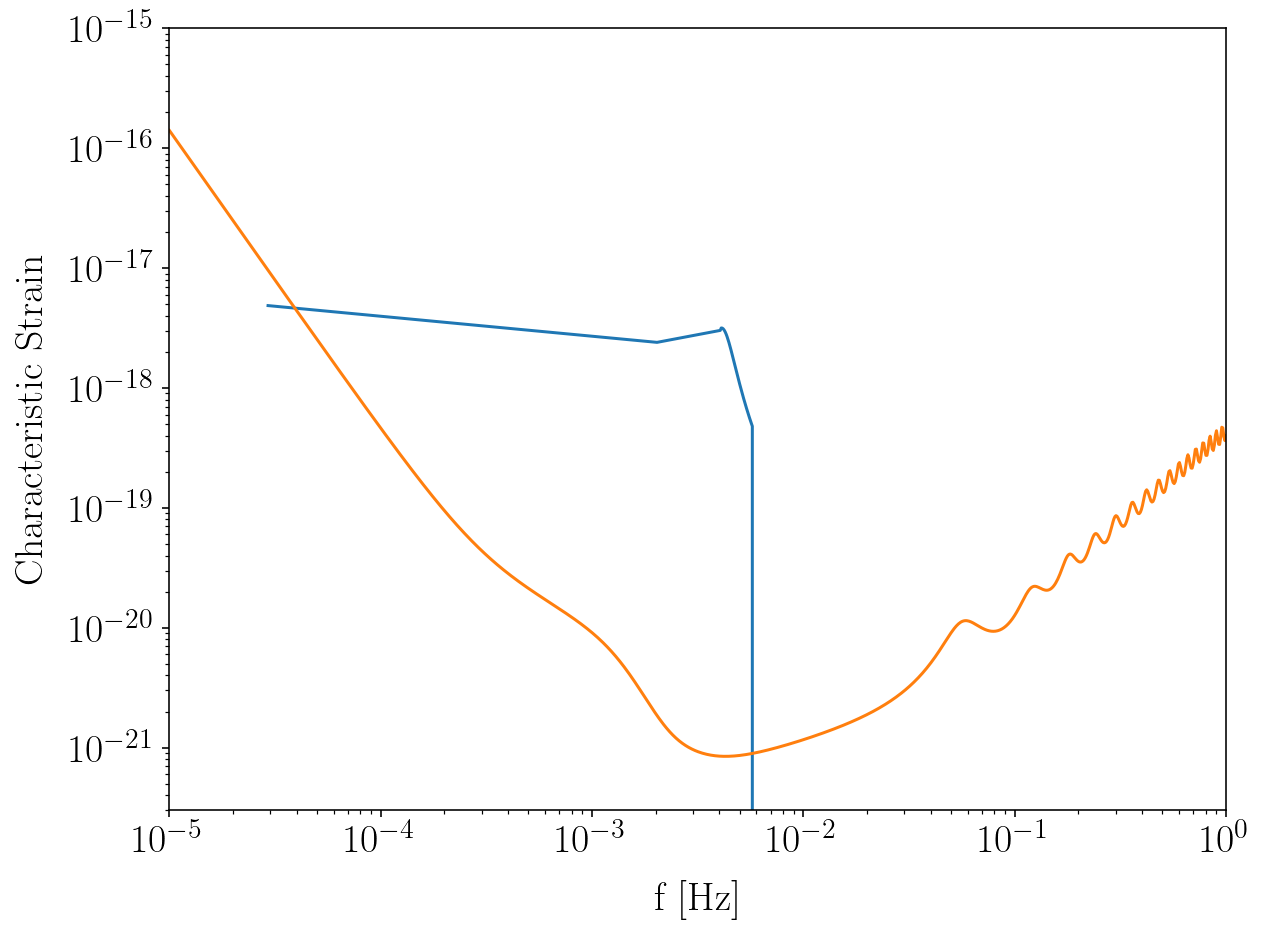

In [8]:
m1 = 0.5e6*pa.TSUN 
m2 = 0.5e6*pa.TSUN
z = 3.0
T_merge = 1.*li.YEAR

binary = wt.Binary(m1, m2, z=z)
binary.T_merge = T_merge
binary.SetFreqBounds(lisa)

freqs, X_char = binary.CalcStrain(lisa)
snr = binary.CalcSNR(freqs, X_char, lisa)
print("\nSNR........ {}".format(snr))
binary.PlotStrain(freqs, X_char, lisa)

## Specify a sky location 

Redshift provided. 
	Luminosity Distance........... 25924.151861680206 Mpc

SNR........ 3106.082636777327


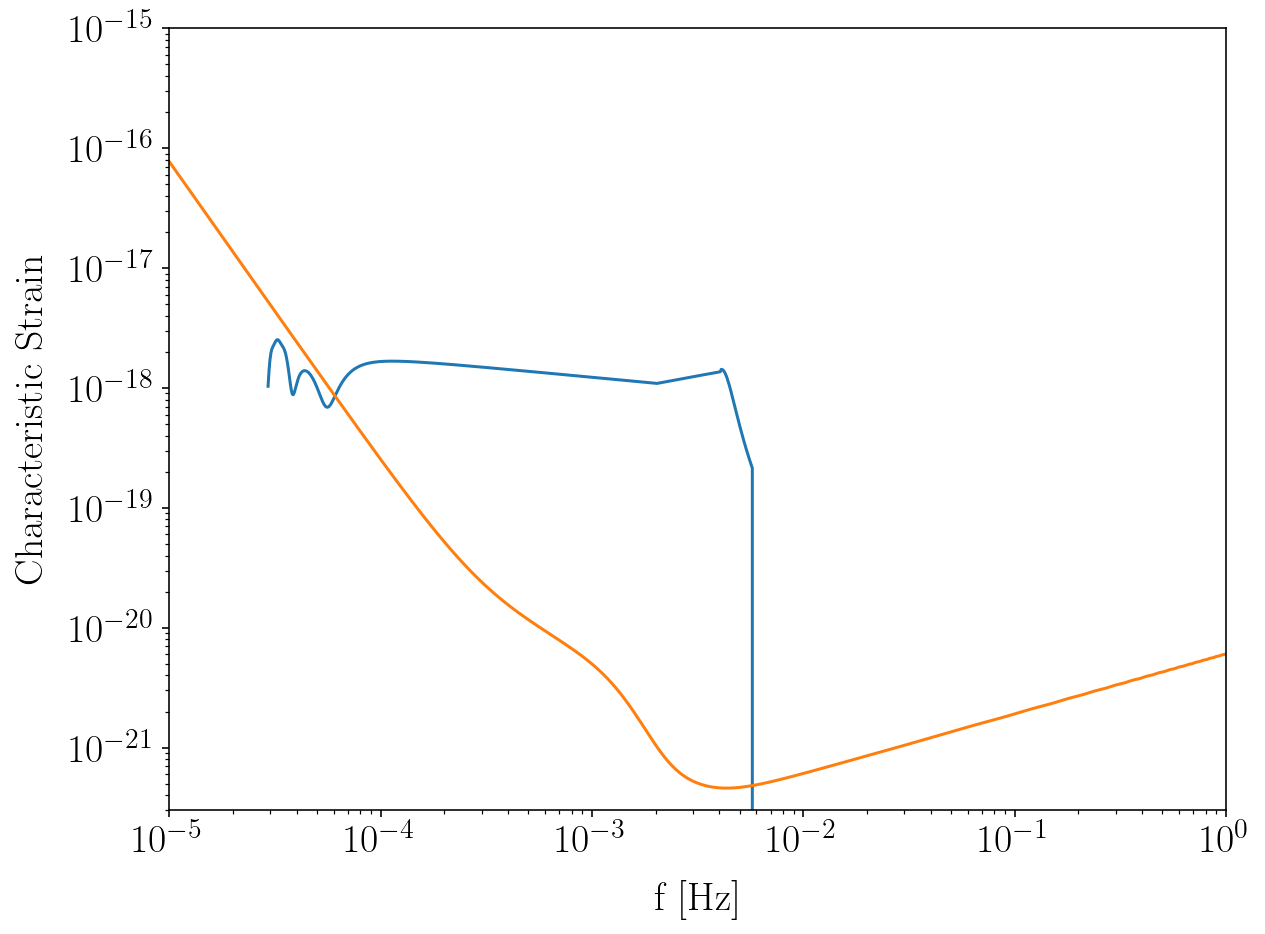

In [9]:
m1 = 0.5e6*pa.TSUN 
m2 = 0.5e6*pa.TSUN
z = 3.0
T_merge = 1.*li.YEAR

binary = wt.Binary(m1, m2, z=z)
binary.T_merge = T_merge
binary.SetFreqBounds(lisa)

theta = 0.5
phi = 2.3

freqs, X_char = binary.CalcStrain(lisa, theta, phi)
snr = binary.CalcSNR(freqs, X_char, lisa)
print("\nSNR........ {}".format(snr))
binary.PlotStrain(freqs, X_char, lisa)

## Choose an inclination as the third parameter

Redshift provided. 
	Luminosity Distance........... 25924.151861680206 Mpc

SNR........ 2905.7396735091643


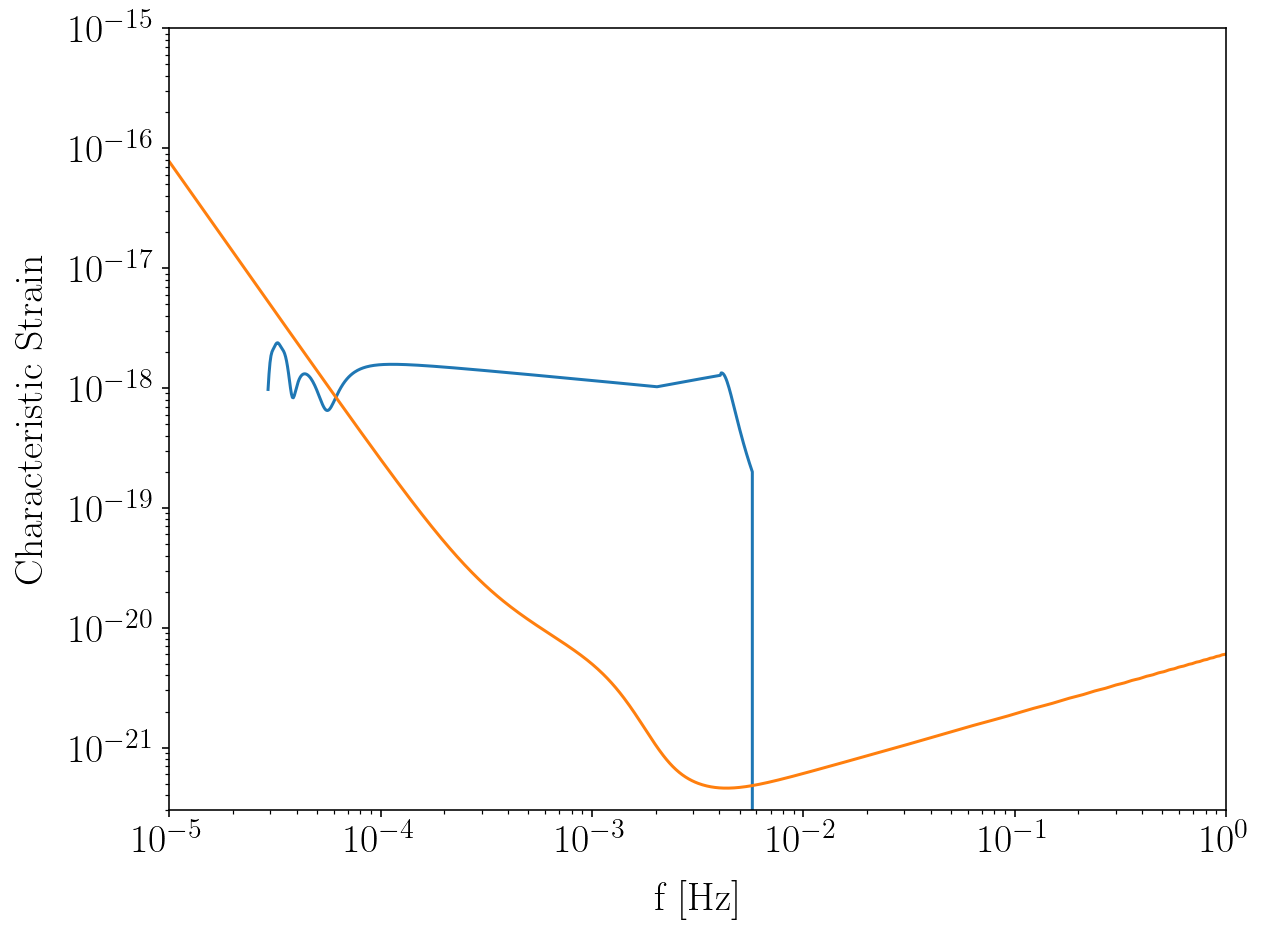

In [10]:
m1 = 0.5e6*pa.TSUN 
m2 = 0.5e6*pa.TSUN
z = 3.0
T_merge = 1.*li.YEAR

binary = wt.Binary(m1, m2, z=z)
binary.T_merge = T_merge
binary.SetFreqBounds(lisa)

theta = 0.5
phi = 2.3
iota = 1.0

freqs, X_char = binary.CalcStrain(lisa, theta, phi, iota)
snr = binary.CalcSNR(freqs, X_char, lisa)
print("\nSNR........ {}".format(snr))
binary.PlotStrain(freqs, X_char, lisa)

# LIGO Binary

Luminosity Distance provided. 
	redshift........... 0.08891326018535295

SNR........ 4.666592661632494


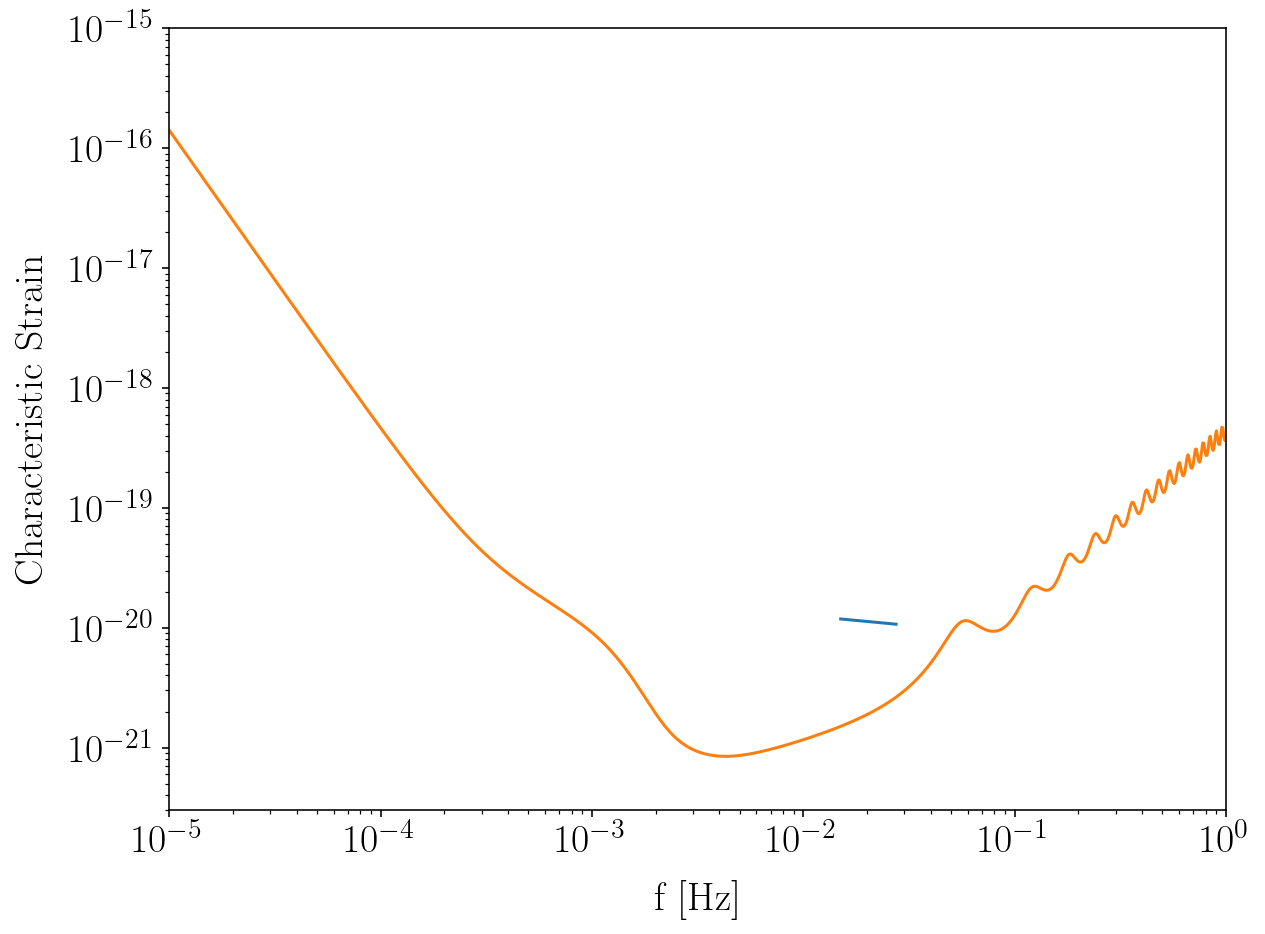

In [11]:
m1 = 36.0*pa.TSUN 
m2 = 29.0*pa.TSUN
Dl = 410.*wt.MPC
T_merge = 5.*li.YEAR

binary = wt.Binary(m1, m2, Dl=Dl)
binary.T_merge = T_merge
binary.SetFreqBounds(lisa)

freqs, X_char = binary.CalcStrain(lisa)
snr = binary.CalcSNR(freqs, X_char, lisa)
print("\nSNR........ {}".format(snr))
binary.PlotStrain(freqs, X_char, lisa)

Luminosity Distance provided. 
	redshift........... 0.08891326018535295

SNR........ 4.657418386475239


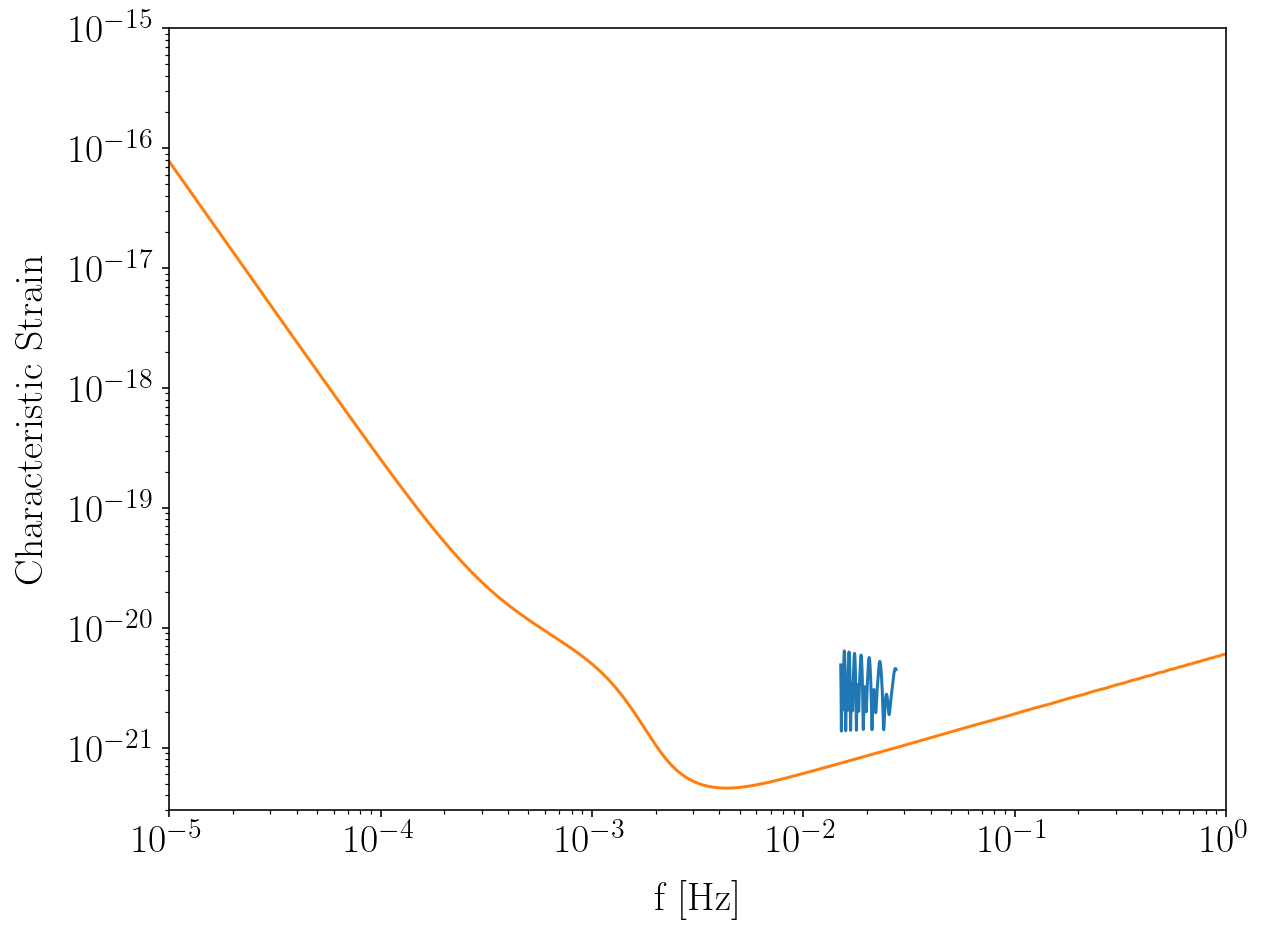

In [12]:
m1 = 36.0*pa.TSUN 
m2 = 29.0*pa.TSUN
Dl = 410.*wt.MPC
T_merge = 5.*li.YEAR

binary = wt.Binary(m1, m2, Dl=Dl)
binary.T_merge = T_merge
binary.SetFreqBounds(lisa)

freqs, X_char = binary.CalcStrain(lisa, 1.1, 1.5)
snr = binary.CalcSNR(freqs, X_char, lisa)
print("\nSNR........ {}".format(snr))
binary.PlotStrain(freqs, X_char, lisa)

# Galactic Binary

Luminosity Distance provided. 
	redshift........... 2.3117351864949706e-07

SNR........ 139.70704772165996


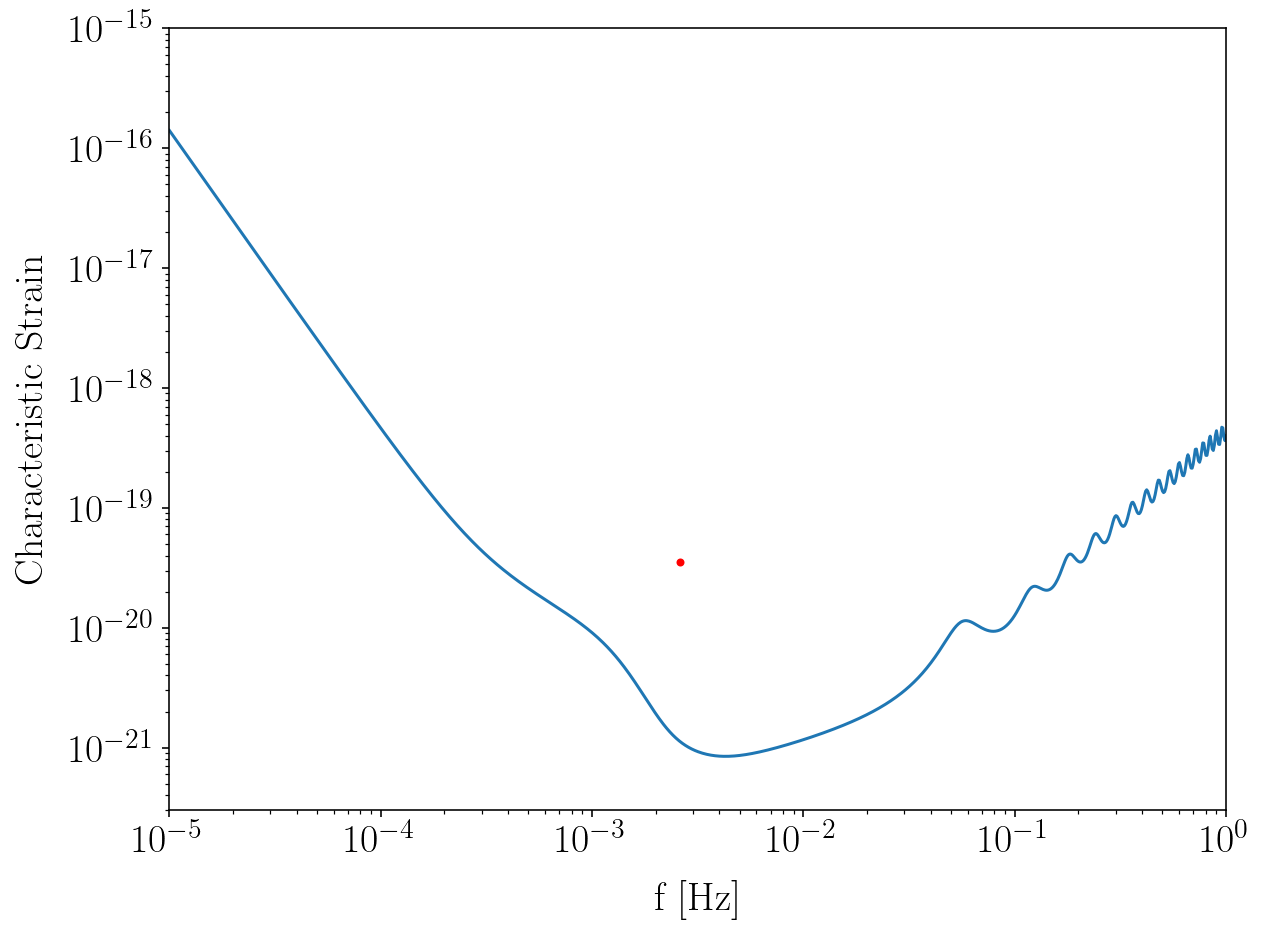

In [13]:
m1 = 0.50*pa.TSUN 
m2 = 0.25*pa.TSUN
Dl = 1.0e-3*wt.MPC
f_start  = 2.6e-3

binary = wt.Binary(m1, m2, Dl=Dl)
binary.f_start = f_start
binary.SetFreqBounds(lisa)

freqs, X_char = binary.CalcStrain(lisa)
snr = binary.CalcSNR(freqs, X_char, lisa)
print("\nSNR........ {}".format(snr))
binary.PlotStrain(freqs, X_char, lisa)

Luminosity Distance provided. 
	redshift........... 2.3117351864949706e-07

SNR........ 212.4515139611185


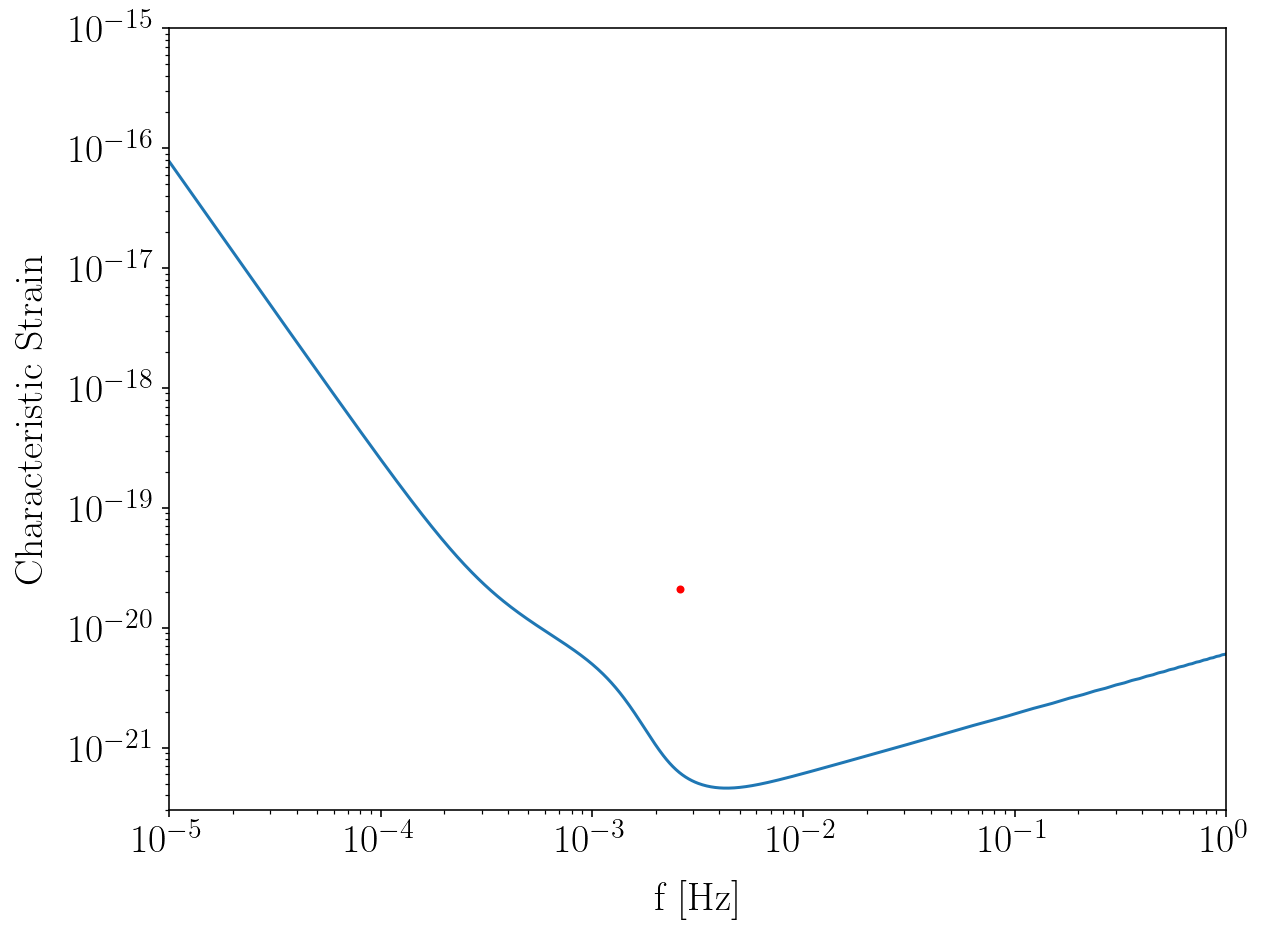

In [14]:
m1 = 0.50*pa.TSUN 
m2 = 0.25*pa.TSUN
Dl = 1.0e-3*wt.MPC
f_start  = 2.6e-3

binary = wt.Binary(m1, m2, Dl=Dl)
binary.f_start = f_start
binary.SetFreqBounds(lisa)

freqs, X_char = binary.CalcStrain(lisa, 1.1, 1.5)
snr = binary.CalcSNR(freqs, X_char, lisa)
print("\nSNR........ {}".format(snr))
binary.PlotStrain(freqs, X_char, lisa)